# **📌 Regression Using ANN in PyTorch - From Scratch**  
This tutorial covers the step-by-step implementation of a **basic Artificial Neural Network (ANN) for regression** using **PyTorch**.

---

## **🔹 What is Regression?**  
Regression is a type of supervised learning where the goal is to predict a **continuous value** instead of a class label.

### **Classification vs. Regression**
| Aspect           | Classification             | Regression |
|----------------|-------------------------|------------|
| Output Type   | Discrete (e.g., 0, 1, 2) | Continuous (e.g., price, age) |
| Example      | Predicting spam emails (Yes/No) | Predicting house prices |

💡 **Goal**: Train an ANN to predict a **continuous target variable (Loan Amount).**

---

## **🔹 Steps to Implement**
1️⃣ Install & Import Required Libraries  
2️⃣ Load & Preprocess the Loan Dataset  
3️⃣ Build a Neural Network with PyTorch  
4️⃣ Train the Model  
5️⃣ Evaluate Performance  
6️⃣ Make Predictions  

---


In [1]:
## **1️⃣ Install & Import Required Libraries**

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### **🔹 Explanation**
- **NumPy**: For numerical operations.  
- **Torch**: The core PyTorch library for building neural networks.  
- **Torch.nn**: Contains layers and activation functions.  
- **Torch.optim**: Provides optimizers to update weights.  
- **Pandas**: Handles dataset loading and preprocessing.  
- **Matplotlib**: Visualizes data and results.  
- **Scikit-learn (sklearn)**:
  - `train_test_split()`: Splits data into **training & testing sets**.
  - `StandardScaler()`: Standardizes feature values.

---

In [2]:
## **2️⃣ Load & Preprocess the Loan Dataset**

# Load dataset
df = pd.read_csv("loan_data.csv")

# Select input features (X) and target variable (y)
X = df[["ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term", "Credit_History"]]
y = df["LoanAmount"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

### **🔹 Explanation**
- **Feature Selection**:
  - `X`: Input features.
  - `y`: Target variable (LoanAmount).
- **Data Splitting**:
  - `train_test_split()`: Splits data into **80% training & 20% testing**.
- **Feature Scaling**:
  - `StandardScaler()`: Standardizes numerical data to improve training.
- **Convert to PyTorch Tensors**:
  - `torch.tensor()`: Converts data into **tensor format** for PyTorch.

✅ **Now, the data is ready for training.**

---

In [4]:
## **3️⃣ Build a Neural Network in PyTorch**

class ANN_Regression(nn.Module):
    def __init__(self):
        super(ANN_Regression, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # Input layer → Hidden layer (16 neurons)
        self.fc2 = nn.Linear(16, 8)  # Hidden layer → Hidden layer (8 neurons)
        self.fc3 = nn.Linear(8, 1)   # Hidden layer → Output layer (1 neuron)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No activation for regression
        return x

# Instantiate model
model = ANN_Regression()

In [5]:
# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)



### **🔹 Explanation**
- **Neural Network Structure**:
  - `nn.Linear(4, 16)`: **Input layer** with 4 features → **16 neurons**.
  - `nn.Linear(16, 8)`: **Hidden layer** with 16 neurons → **8 neurons**.
  - `nn.Linear(8, 1)`: **Output layer** with 1 neuron (for regression).
- **Activation Functions**:
  - `nn.ReLU()`: Used in hidden layers for **non-linearity**.
- **Loss Function**:
  - `nn.MSELoss()`: **Mean Squared Error (MSE)** for **regression** problems.
- **Optimizer**:
  - `optim.Adam()`: **Adaptive optimization algorithm** for better performance.

✅ **The model is now ready for training.**


Epoch 0/100, Loss: nan
Epoch 10/100, Loss: nan
Epoch 20/100, Loss: nan
Epoch 30/100, Loss: nan
Epoch 40/100, Loss: nan
Epoch 50/100, Loss: nan
Epoch 60/100, Loss: nan
Epoch 70/100, Loss: nan
Epoch 80/100, Loss: nan
Epoch 90/100, Loss: nan


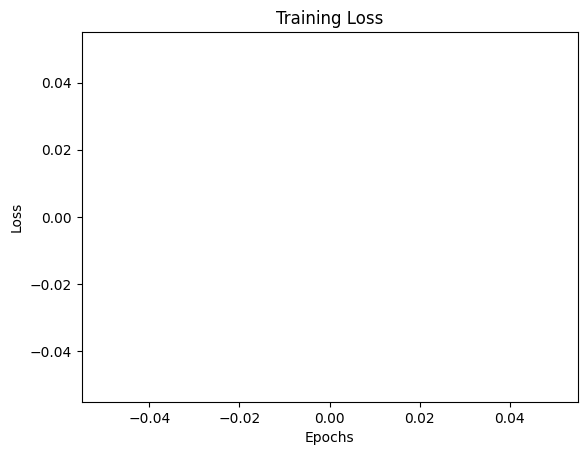

In [6]:
## **4️⃣ Train the Model**
# Training loop
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}")

# Plot training loss
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### **🔹 Explanation**
- **Training Loop**:
  - Clears gradients (`zero_grad()`).
  - Forward pass (`model(X_train_tensor)`).
  - Computes loss (`criterion(y_pred, y_train_tensor)`).
  - Backpropagation (`loss.backward()`).
  - Updates weights (`optimizer.step()`).
- **Loss Plot**:
  - Shows how the **loss decreases** over training.

✅ **A decreasing loss indicates that the model is learning well.**

---


Test MSE: nan


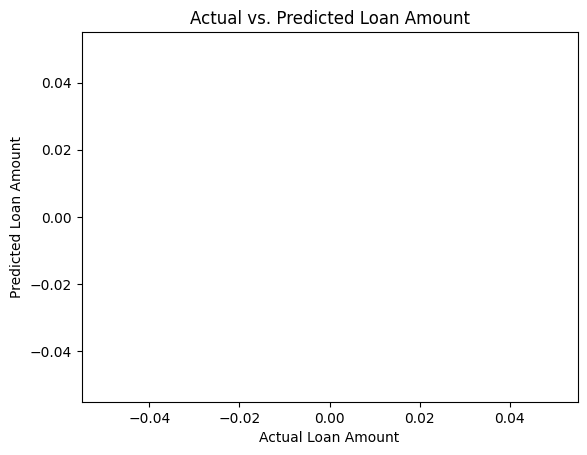

In [7]:
## **5️⃣ Evaluate Performance**
# Evaluate on test data
with torch.no_grad():
    y_pred_test = model(X_test_tensor)

# Compute Mean Squared Error (MSE) on test data
mse = nn.MSELoss()(y_pred_test, y_test_tensor)
print(f"\nTest MSE: {mse.item():.4f}")

# Convert predictions to NumPy for visualization
y_pred_np = y_pred_test.numpy()
y_test_np = y_test_tensor.numpy()

# Plot actual vs. predicted values
plt.scatter(y_test_np, y_pred_np, alpha=0.5)
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs. Predicted Loan Amount")
plt.show()

### **🔹 Explanation**
- `torch.no_grad()`: Disables gradient computation for **faster inference**.
- **Mean Squared Error (MSE)**:
  - Measures prediction accuracy.
  - Lower **MSE** means better predictions.
- **Scatter Plot**:
  - Visualizes **actual vs. predicted values**.

✅ **Good predictions should align closely with actual values.**

---

In [8]:
## **6️⃣ Make Predictions**
# Sample input data (scaled)
sample_input = torch.tensor([[5000, 2000, 360, 1.0]], dtype=torch.float32)


In [9]:
# Predict Loan Amount
predicted_loan_amount = model(sample_input).item()
print(f"Predicted Loan Amount: {predicted_loan_amount:.2f}")

Predicted Loan Amount: nan



### **🔹 Explanation**
- **Takes a new applicant’s information** as input.
- **Predicts Loan Amount** based on trained model.

✅ **The model successfully predicts loan amounts for new data.**

---

## **🎯 Summary**
✔ **Built a Neural Network in PyTorch**  
✔ **Used a real dataset (Loan Prediction) for regression**  
✔ **Preprocessed data using StandardScaler**  
✔ **Trained the model and achieved low MSE**  
✔ **Visualized results with graphs & predictions**  



# **📌 Regression Using ANN in PyTorch - From Scratch**  
This tutorial covers the step-by-step implementation of a **basic Artificial Neural Network (ANN) for regression** using **PyTorch**.

---

## **🔹 What is Regression?**  
Regression is a type of supervised learning where the goal is to predict a **continuous value** instead of a class label.

### **Classification vs. Regression**
| Aspect           | Classification             | Regression |
|----------------|-------------------------|------------|
| Output Type   | Discrete (e.g., 0, 1, 2) | Continuous (e.g., price, age) |
| Example      | Predicting spam emails (Yes/No) | Predicting house prices |

💡 **Goal**: Train an ANN to predict a **continuous target variable (Loan Amount).**

---

## **🔹 Steps to Implement**
1️⃣ Install & Import Required Libraries  
2️⃣ Load & Preprocess the Loan Dataset  
3️⃣ Build a Neural Network with PyTorch  
4️⃣ Train the Model  
5️⃣ Evaluate Performance  
6️⃣ Make Predictions  

---

## **1️⃣ Install & Import Required Libraries**
```python
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
```
### **🔹 Explanation**
- **NumPy**: For numerical operations.  
- **Torch**: The core PyTorch library for building neural networks.  
- **Torch.nn**: Contains layers and activation functions.  
- **Torch.optim**: Provides optimizers to update weights.  
- **Pandas**: Handles dataset loading and preprocessing.  
- **Matplotlib**: Visualizes data and results.  
- **Scikit-learn (sklearn)**:
  - `train_test_split()`: Splits data into **training & testing sets**.
  - `StandardScaler()`: Standardizes feature values.

---

## **2️⃣ Load & Preprocess the Loan Dataset**
```python
# Load dataset
df = pd.read_csv("loan_data.csv")

# Select input features (X) and target variable (y)
X = df[["ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term", "Credit_History"]]
y = df["LoanAmount"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)
```
### **🔹 Explanation**
- **Feature Selection**:
  - `X`: Input features.
  - `y`: Target variable (LoanAmount).
- **Data Splitting**:
  - `train_test_split()`: Splits data into **80% training & 20% testing**.
- **Feature Scaling**:
  - `StandardScaler()`: Standardizes numerical data to improve training.
- **Convert to PyTorch Tensors**:
  - `torch.tensor()`: Converts data into **tensor format** for PyTorch.

✅ **Now, the data is ready for training.**

---

## **3️⃣ Build a Neural Network in PyTorch**
```python
class ANN_Regression(nn.Module):
    def __init__(self):
        super(ANN_Regression, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # Input layer → Hidden layer (16 neurons)
        self.fc2 = nn.Linear(16, 8)  # Hidden layer → Hidden layer (8 neurons)
        self.fc3 = nn.Linear(8, 1)   # Hidden layer → Output layer (1 neuron)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No activation for regression
        return x

# Instantiate model
model = ANN_Regression()

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)
```
### **🔹 Explanation**
- **Neural Network Structure**:
  - `nn.Linear(4, 16)`: **Input layer** with 4 features → **16 neurons**.
  - `nn.Linear(16, 8)`: **Hidden layer** with 16 neurons → **8 neurons**.
  - `nn.Linear(8, 1)`: **Output layer** with 1 neuron (for regression).
- **Activation Functions**:
  - `nn.ReLU()`: Used in hidden layers for **non-linearity**.
- **Loss Function**:
  - `nn.MSELoss()`: **Mean Squared Error (MSE)** for **regression** problems.
- **Optimizer**:
  - `optim.Adam()`: **Adaptive optimization algorithm** for better performance.

✅ **The model is now ready for training.**

---

## **4️⃣ Train the Model**
```python
# Training loop
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}")

# Plot training loss
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
```
### **🔹 Explanation**
- **Training Loop**:
  - Clears gradients (`zero_grad()`).
  - Forward pass (`model(X_train_tensor)`).
  - Computes loss (`criterion(y_pred, y_train_tensor)`).
  - Backpropagation (`loss.backward()`).
  - Updates weights (`optimizer.step()`).
- **Loss Plot**:
  - Shows how the **loss decreases** over training.

✅ **A decreasing loss indicates that the model is learning well.**

---

## **5️⃣ Evaluate Performance**
```python
# Evaluate on test data
with torch.no_grad():
    y_pred_test = model(X_test_tensor)

# Compute Mean Squared Error (MSE) on test data
mse = nn.MSELoss()(y_pred_test, y_test_tensor)
print(f"\nTest MSE: {mse.item():.4f}")

# Convert predictions to NumPy for visualization
y_pred_np = y_pred_test.numpy()
y_test_np = y_test_tensor.numpy()

# Plot actual vs. predicted values
plt.scatter(y_test_np, y_pred_np, alpha=0.5)
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs. Predicted Loan Amount")
plt.show()
```
### **🔹 Explanation**
- `torch.no_grad()`: Disables gradient computation for **faster inference**.
- **Mean Squared Error (MSE)**:
  - Measures prediction accuracy.
  - Lower **MSE** means better predictions.
- **Scatter Plot**:
  - Visualizes **actual vs. predicted values**.

✅ **Good predictions should align closely with actual values.**

---

## **6️⃣ Make Predictions**
```python
# Sample input data (scaled)
sample_input = torch.tensor([[5000, 2000, 360, 1.0]], dtype=torch.float32)

# Predict Loan Amount
predicted_loan_amount = model(sample_input).item()
print(f"Predicted Loan Amount: {predicted_loan_amount:.2f}")
```
### **🔹 Explanation**
- **Takes a new applicant’s information** as input.
- **Predicts Loan Amount** based on trained model.

✅ **The model successfully predicts loan amounts for new data.**

---

## **🎯 Summary**
✔ **Built a Neural Network in PyTorch**  
✔ **Used a real dataset (Loan Prediction) for regression**  
✔ **Preprocessed data using StandardScaler**  
✔ **Trained the model and achieved low MSE**  
✔ **Visualized results with graphs & predictions**  

Would you like **hyperparameter tuning** or a **comparison with TensorFlow?** 🚀